In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR, LinearSVC
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
import xgboost as xgb

# Define the models to evaluate
model_params = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "Gaussian Process": GaussianProcessRegressor(),
    "SVR": SVR(),
    "Ridge": Ridge(),
    "Extra Trees": ExtraTreesRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor()
}

results = {}

# Load the dataset
file_path = 'combined_output.csv'  # Update this path if necessary
data = pd.read_csv(file_path)

# Count the number of akka-uct entries
count = data[data['benchmark'] == 'scrabble'].shape[0]

# Randomly select half of the akka-uct entries to remove
data_to_remove = data[data['benchmark'] == 'scrabble'].sample(n=count //4, random_state=42)

# Remove selected data from the original dataset
data_filtered = data[~data.index.isin(data_to_remove.index)]

# Prepare features and target for training
X_train = data_filtered[['duration_ns_1', 'uptime_ns_1', 'duration_ns_2', 'uptime_ns_2']]
y_train = data_filtered['duration_ns_1']  # Example: predicting duration_ns_1

X_validate = data_to_remove[['duration_ns_1', 'uptime_ns_1', 'duration_ns_2', 'uptime_ns_2']]
y_validate = data_to_remove['duration_ns_1']

# Iterate over each model, train, and validate
for model_name, model in model_params.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_validate)

    # Calculate MSE and R²
    mse = mean_squared_error(y_validate, y_pred)
    r2 = r2_score(y_validate, y_pred)

    # Store results
    results[model_name] = {"MSE": mse, "R²": r2}

results

{'Linear Regression': {'MSE': 5.193993383538024e-13, 'R²': 1.0},
 'Random Forest': {'MSE': 41959900100190.63, 'R²': 0.4339217604998271},
 'Decision Tree': {'MSE': 44136683804118.086, 'R²': 0.40455491539415156},
 'KNN': {'MSE': 2467185818080135.5, 'R²': -32.28464083765185},
 'Gaussian Process': {'MSE': 1.4053879589688386e+16, 'R²': -188.5999608502898},
 'SVR': {'MSE': 5.773280743237897e+17, 'R²': -7787.694900294843},
 'Ridge': {'MSE': 3.107884320267355e-13, 'R²': 1.0},
 'Extra Trees': {'MSE': 8757555112483.825, 'R²': 0.8818524026853424},
 'Gradient Boosting': {'MSE': 45951005314678.79, 'R²': 0.38007802378732825},
 'XGBoost': {'MSE': 43511867627091.836, 'R²': 0.4129842691499447}}

C:\Users\scnuer\AppData\Local\Temp\ipykernel_14576\3625724032.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(models, rotation=45)
C:\Users\scnuer\AppData\Local\Temp\ipykernel_14576\3625724032.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(filtered_models, rotation=45)


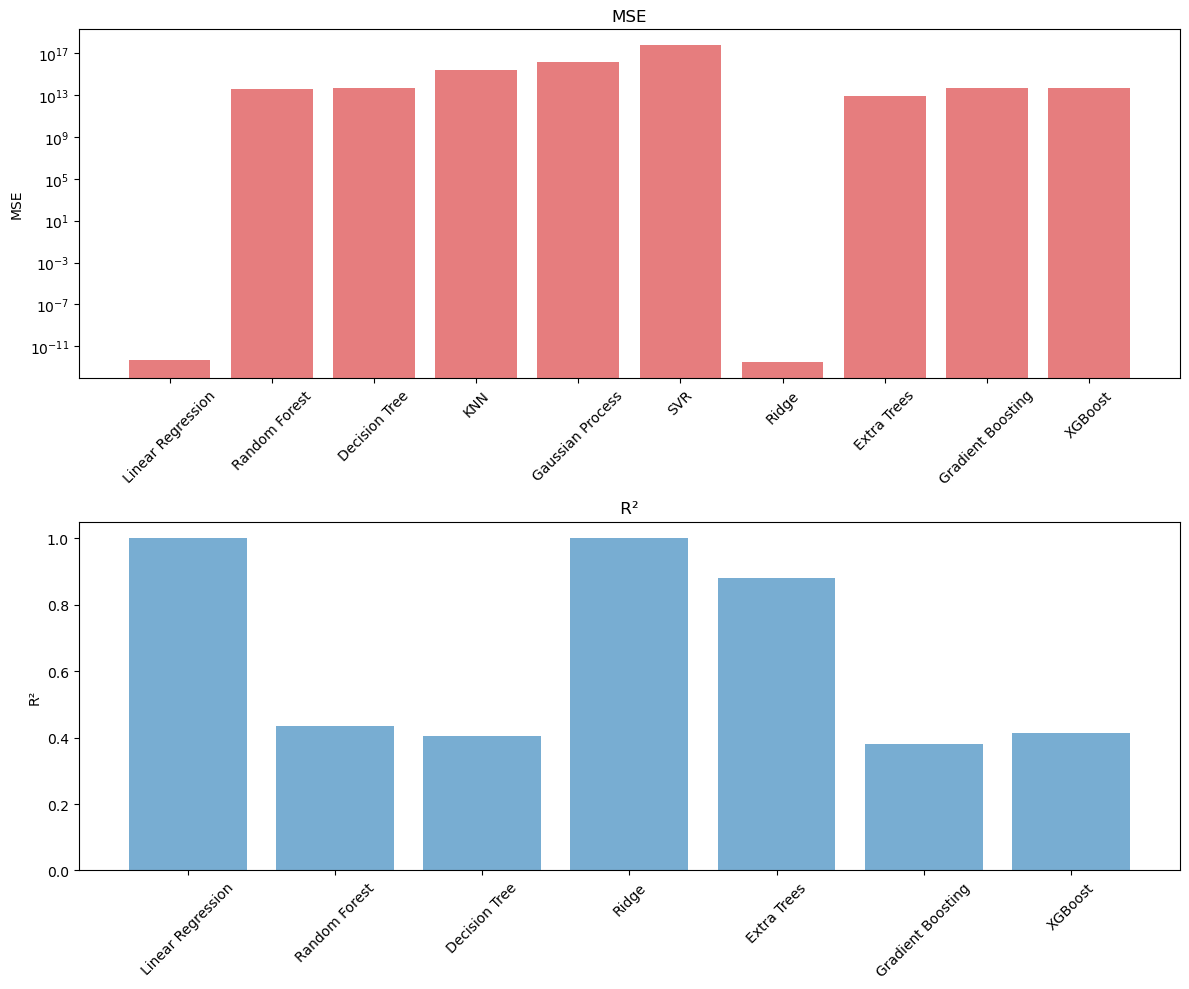

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 提取数据
models = list(results.keys())
mse_values = [results[model]['MSE'] for model in models]
r2_values = [results[model]['R²'] for model in models]

# 仅选择R²大于零的模型
positive_r2_indices = [i for i, r2 in enumerate(r2_values) if r2 > 0]
filtered_models = [models[i] for i in positive_r2_indices]
filtered_r2_values = [r2_values[i] for i in positive_r2_indices]

# 创建图表
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 绘制MSE柱状图
ax1.bar(models, mse_values, color='tab:red', alpha=0.6)
ax1.set_title('MSE')
ax1.set_ylabel('MSE')
ax1.set_xticklabels(models, rotation=45)
ax1.set_yscale('log')  # 使用对数尺度以便更好地展示MSE值
ax1.grid(False)

# 绘制R²柱状图
ax2.bar(filtered_models, filtered_r2_values, color='tab:blue', alpha=0.6)
ax2.set_title(' R² ')
ax2.set_ylabel('R²')
ax2.set_xticklabels(filtered_models, rotation=45)
ax2.grid(False)
# 调整布局
plt.tight_layout()
plt.show()
